# Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
#Importing .json file
country_geo = r"C:\Users\Akira\Documents\Advanced Analytics and Dashboard Design Project\Data\Original Data\us-states.json"

In [4]:
path = r"C:\Users\Akira\Documents\Advanced Analytics and Dashboard Design Project"

In [5]:
NBA = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'NBA.csv'), index_col = False)

In [6]:
NBA.head()

,player_name,team_abbreviation,Team City,Team_State,age,player_height,player_weight,college,country,draft_year,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,Houston,Texas,22,193.04,94.800728,Louisiana State,USA,1996,...,3.9,1.5,2.4,0.3,4%,4%,4%,4%,4%,1996-97
1,Gaylon Nickerson,WAS,Washington,District of Columbia,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,...,3.8,1.3,0.3,8.9,3%,11%,17%,50%,3%,1996-97
2,George Lynch,VAN,Vancouver,Canada,26,203.20,103.418976,North Carolina,USA,1993,...,8.3,6.4,1.9,-8.2,11%,19%,18%,51%,11%,1996-97
3,George McCloud,LAL,Los Angeles,California,30,203.20,102.058200,Florida State,USA,1989,...,10.2,2.8,1.7,-2.7,3%,11%,21%,53%,3%,1996-97
4,George Zidek,DEN,Denver,Colorado,23,213.36,119.748288,UCLA,USA,1995,...,2.8,1.7,0.3,-14.1,10%,17%,20%,50%,10%,1996-97


In [7]:
NBA.shape

(12844, 23)

In [8]:
NBA.dtypes

player_name           object
team_abbreviation     object
Team City             object
Team_State            object
age                    int64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct              object
dreb_pct              object
usg_pct               object
ts_pct                object
ast_pct               object
season                object
dtype: object

## Data Wrangling

In [9]:
columns = ['team_abbreviation', 'Team_State', 'pts', 'reb', 'ast', 'gp', 'player_name']

In [10]:
NBA_geo = NBA[columns]

In [11]:
NBA_geo.head()

,team_abbreviation,Team_State,pts,reb,ast,gp,player_name
0,HOU,Texas,3.9,1.5,2.4,64,Randy Livingston
1,WAS,District of Columbia,3.8,1.3,0.3,4,Gaylon Nickerson
2,VAN,Canada,8.3,6.4,1.9,41,George Lynch
3,LAL,California,10.2,2.8,1.7,64,George McCloud
4,DEN,Colorado,2.8,1.7,0.3,52,George Zidek


In [12]:
# making sure the city name is consistent with the .json file
NBA_geo['Team_State'] = NBA_geo['Team_State'].str.title()

C:\Users\Akira\AppData\Local\Temp\ipykernel_11968\1018395003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_geo['Team_State'] = NBA_geo['Team_State'].str.title()


## Data Consistency Checks


In [13]:
# Check for missing values
# no missing values
NBA_geo.isnull().sum()

team_abbreviation    0
Team_State           0
pts                  0
reb                  0
ast                  0
gp                   0
player_name          0
dtype: int64

In [14]:
# Checking for duplicates
dups = NBA_geo.duplicated()

In [15]:
#no duplicates found
dups.shape

(12844,)

## Checking for extreme values

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pts', ylabel='Count'>

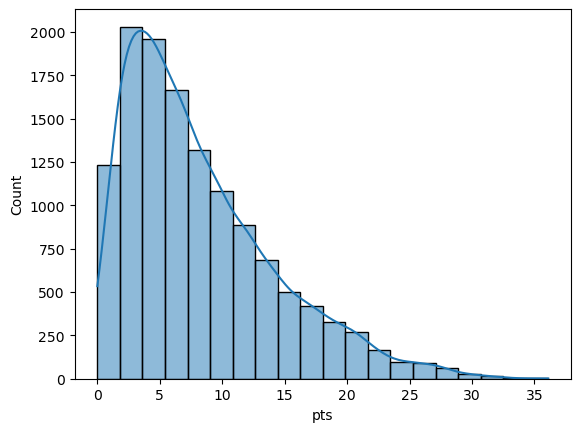

In [16]:
sns.histplot(NBA_geo['pts'], bins=20, kde = True) 

No extreme values found

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='reb', ylabel='Count'>

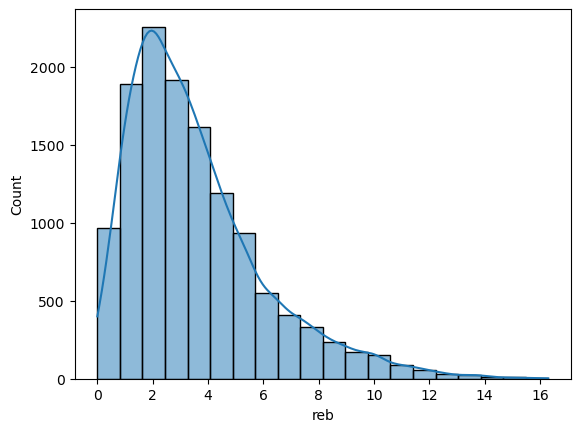

In [17]:
sns.histplot(NBA_geo['reb'], bins=20, kde = True) 

No extreme values found

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ast', ylabel='Count'>

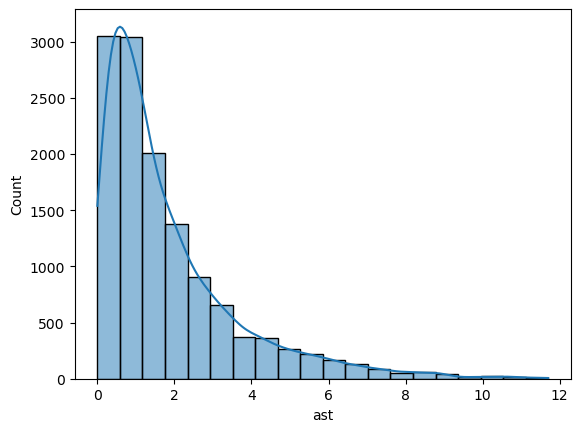

In [18]:
sns.histplot(NBA_geo['ast'], bins=20, kde = True) 

No extreme values found


C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gp', ylabel='Count'>

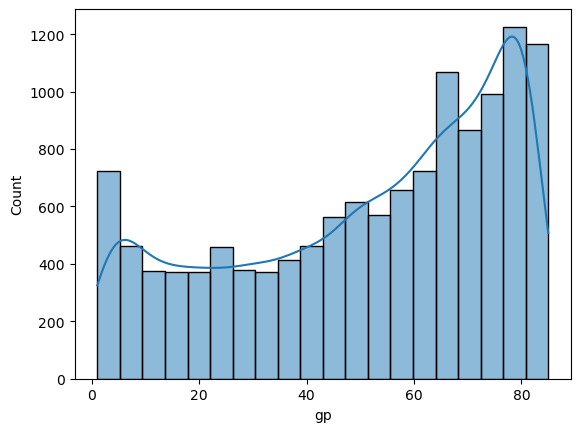

In [19]:
sns.histplot(NBA_geo['gp'], bins=20, kde = True) 

No extreme values found

# For my cholorpeth maps, I am going to be checking states (NBA team regions) with points, rebounds,  and assists  to analyze trends of NBA stats among regions in the US

## Points

In [20]:
data_to_plot = NBA_geo[['Team_State','pts']]
data_to_plot.head()

,Team_State,pts
0,Texas,3.9
1,District Of Columbia,3.8
2,Canada,8.3
3,California,10.2
4,Colorado,2.8


In [21]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)


folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['Team_State', 'pts'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "pts").add_to(map)
folium.LayerControl().add_to(map)

map

Based on this analysis, I can see the spread of points across each NBA state. What I instantly notice is where points are recorded to be higher in Florida, Pennsylvania, and Massachusetts. It seems like the East Coast teams (Boston, Philly, and Florida) seem to display a higher point averages. This can make sense since those teams have a history of having very good players that dominate their region well. This can lead to future questions such as:

1) Who in those states have averaged higher points, and did it lead to NBA championships?
2) Is the East a weaker conference, leading to good teams in that region to score higher?
3) Why is it the East has both the higher and lower point averages per state?

## Rebounds

In [22]:
data_to_plot_2 = NBA_geo[['Team_State','reb']]
data_to_plot_2.head()

,Team_State,reb
0,Texas,1.5
1,District Of Columbia,1.3
2,Canada,6.4
3,California,2.8
4,Colorado,1.7


In [23]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)


folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_2,
    columns = ['Team_State', 'reb'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "reb").add_to(map)
folium.LayerControl().add_to(map)

map

This visualization is a chloropeth map of NBA rebounds in the NBA over time. The main observation I see is that the East Coast is much more rebound focused than the West Coast. From that trend I can notice to say that the East is a much more "grit & grind" defense focused region compared to the "flashy" offensive focused side of the West Coast. Anoither interesting trend is that Philadelphia has a high range of rebounds and points, but in the current NBA they struggle to win champsionships. Some questions I raise is the following:

1) How important is rebounding in the modern NBA?
2) Why is the East Coast so high in overall rebounding?
3) Do NBA fans in the East Coast differ in basketball values than the West Coast?

## Assists

In [24]:
data_to_plot_3 = NBA_geo[['Team_State','ast']]
data_to_plot_3.head()

,Team_State,ast
0,Texas,2.4
1,District Of Columbia,0.3
2,Canada,1.9
3,California,1.7
4,Colorado,0.3


In [25]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)


folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_3,
    columns = ['Team_State', 'ast'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "ast").add_to(map)
folium.LayerControl().add_to(map)

map

Based on this visualizations, there are some very interesting trends when it comes to assists. That is because assists usually relate to an efficient team basketball mindset. California teams seem to excel in Assists especially, and I can understand since so many top tier point guards in NBA history have played for California teams. Another interesting obsevation is that the Boston Celtics have excelled in all 3 categories (points, assists, and rebounds). The celtics have 17 NBA championships, which can attest through these visualizations and how they dominate in all fields. Some questions I raise is the following: 

1) Why is Philadelphia so good at so many categories but do not win championships?
2) What other statistics I should be compare across the US that have an impact on winning?
3) Which region of the 